In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Precipitation Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Ispect what's in the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for d in columns:
    print(d['name'], d["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Check the most recent dates for each station in the Measurement database
session.query(Measurement.date).\
    group_by(Measurement.station).\
    order_by(func.max(Measurement.date)).all()

[('2015-10-30'),
 ('2015-11-20'),
 ('2017-07-31'),
 ('2017-07-31'),
 ('2017-08-18'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23')]

In [14]:
# Based on the above most recent date, we can tell that we will be using the dates from 2016-08-23 till 2017-08-23 
date = dt.datetime(2016, 8, 22)
date2 = dt.datetime(2017, 8, 24)

sel = [Measurement.date, Measurement.prcp]

lastyear_averages = session.query(*sel).\
    filter(Measurement.date > date).filter(Measurement.date < date2).all()

lastyear_averages

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# lot the results using the DataFrame plot method
df = pd.DataFrame(lastyear_averages, columns=['date', 'precipitation'])
df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


Text(0, 0.5, 'Inches')

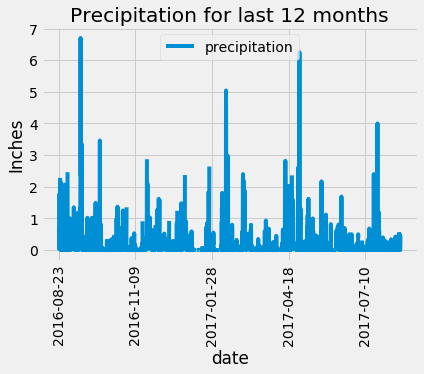

In [16]:
df.set_index('date', inplace=True)
df = df.sort_index()

ax = df.plot(rot=90)
ax.set_title("Precipitation for last 12 months")
ax.set_ylabel("Inches")

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the observation counts in descending order.
# I have used two methods here, below is the first method using panda dataframe
sel2 = [Measurement.station, Measurement.tobs]

most_active = session.query(*sel2).all()

most_active

[('USC00519397', 65.0),
 ('USC00519397', 63.0),
 ('USC00519397', 74.0),
 ('USC00519397', 76.0),
 ('USC00519397', 73.0),
 ('USC00519397', 70.0),
 ('USC00519397', 64.0),
 ('USC00519397', 68.0),
 ('USC00519397', 73.0),
 ('USC00519397', 64.0),
 ('USC00519397', 61.0),
 ('USC00519397', 66.0),
 ('USC00519397', 65.0),
 ('USC00519397', 68.0),
 ('USC00519397', 64.0),
 ('USC00519397', 72.0),
 ('USC00519397', 66.0),
 ('USC00519397', 66.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 71.0),
 ('USC00519397', 67.0),
 ('USC00519397', 76.0),
 ('USC00519397', 68.0),
 ('USC00519397', 72.0),
 ('USC00519397', 70.0),
 ('USC00519397', 67.0),
 ('USC00519397', 66.0),
 ('USC00519397', 67.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 64.0),
 ('USC00519397', 69.0),
 ('USC00519397', 73.0),
 ('USC00519397', 73.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 71.0),
 ('USC00519397',

In [20]:
df2 = pd.DataFrame(most_active, columns=['station', 'tobs'])
df2.head()

,station,tobs
0,USC00519397,65.0
1,USC00519397,63.0
2,USC00519397,74.0
3,USC00519397,76.0
4,USC00519397,73.0


In [21]:
station_grouping = df2.groupby('station').count()
station_grouping2 = station_grouping.sort_values('tobs', ascending=False)
station_grouping2

,tobs
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [22]:
# Second method using the SQLAlchemy queries 
sel = [Measurement.id, Measurement.station, func.count(Measurement.station)]

most_active_station = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_station

[(12188, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2725, 'USC00513117', 2709),
 (9519, 'USC00519523', 2669),
 (16939, 'USC00516128', 2612),
 (5434, 'USC00514830', 2202),
 (14960, 'USC00511918', 1979),
 (7636, 'USC00517948', 1372),
 (9008, 'USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
temperature = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()

temperature

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the max date for station USC00519281
session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).\
    order_by(func.max(Measurement.date)).all()

[('2017-08-18')]

In [25]:
# Query the last 12 months of temperature observation data for this station.
date = dt.datetime(2016, 8, 17)
date2 = dt.datetime(2017, 8, 18)

sel = [Measurement.date, Measurement.tobs]

tobs_lastyear = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > date).filter(Measurement.date <= date2).all()

tobs_lastyear

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [26]:
df3 = pd.DataFrame(tobs_lastyear, columns=['date', 'tobs'])
df3.head()

,date,tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


Text(0, 0.5, 'Frequency')

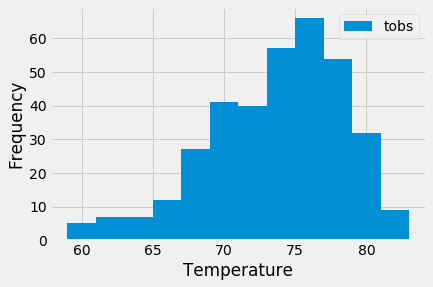

In [27]:
# Plot the results as a histogram.
df3.plot.hist(bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

## Bonus Challenge Assignment

### Temperature Analysis I

In [28]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
june = session.query(Measurement.date, func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "06").all()

june

[('2010-06-01', 74.94411764705882)]

In [29]:
june2 = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()


In [30]:
# Identify the average temperature in December at all stations across all available years in the dataset. 
dec = session.query(Measurement.date, func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

dec

[('2010-12-01', 71.04152933421226)]

In [31]:
dec2 = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()


In [32]:
df4 = pd.DataFrame(june2, columns=['date', 'tobs'])
df4.head()

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [33]:
df5 = pd.DataFrame(dec2, columns=['date', 'tobs'])
df5.head()

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [34]:
from scipy.stats import ttest_ind
from scipy import stats

In [35]:
stats_june = stats.shapiro(df4['tobs'])
stats_june

(0.983282744884491, 3.5219510684594835e-13)

In [36]:
stats_dec = stats.shapiro(df5['tobs'])
stats_dec

(0.9843476414680481, 9.044617485520767e-12)

In [37]:
# Use unpaired t-test to determine whether the difference in the means, if any, is statistically significant. 
# Use unpairted t-test is due to the June & December statistics are two independent groups.

stats.ttest_ind(df4['tobs'], df5['tobs'])


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

#### p-value is less than 0.05, there is a statistically significant difference in the above two independent groups.

### Temperature Analysis II

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
calc_temps('2012-02-28', '2012-03-05')

[(62.0, 69.57142857142857, 74.0)]

In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tmin = func.min(Measurement.tobs)
tavg = func.avg(Measurement.tobs)
tmax = func.max(Measurement.tobs)

def calc_temps(start_date, end_date):
    return session.query(tmin, tavg, tmax).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# pick a date range to plot a bar chart
date_range = calc_temps('2017-01-01', '2017-01-07')
date_range

[(62.0, 68.36585365853658, 74.0)]

In [40]:
tmin = date_range[0][0]
tavg = date_range[0][1]
tmax = date_range[0][2]
tmax

74.0

Text(0.5, 1.0, 'Trip Avg Temp')

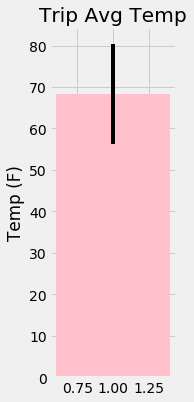

In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(2,6))
plt.bar(x=1,height=tavg, yerr=tmax-tmin, color='pink')
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")

### Daily Rainfall Average

In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# combine both measurement & stations data
sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
total_rainfall = session.query(*sel).\
    filter(Measurement.date >= "2017-01-01").filter(Measurement.date <= "2017-01-07").\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

total_rainfall

[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.61),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.6),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.35),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.2),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0)]

In [43]:
df6 = pd.DataFrame(total_rainfall, columns=['station', 'name', 'latitude', 'longitude', 'elevation', 'prcp'])
df6

,station,name,latitude,longitude,elevation,prcp
0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.61
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.60
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.60
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.35
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.20
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00


In [44]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [45]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
starttrip = dt.datetime(2017, 1, 1)
endtrip = dt.datetime(2017, 1, 7)

# Use the start and end date to create a range of dates
daterange = pd.date_range(starttrip, endtrip)
daterange

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [46]:
# Stip off the year and save a list of %m-%d strings
starttrip2 = starttrip.strftime("%m-%d")
endtrip2 = endtrip.strftime("%m-%d")

daterange2 = daterange.strftime("%m-%d")
daterange2

Index(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07'], dtype='object')

In [47]:
# Create a list for the "mm-dd"s.
date_list = []
for i in daterange2:
    date_list.append(i)
    
date_list

['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07']

In [48]:
# Loop through the list of %m-%d strings and calculate the normals for each date
new_list = []
for j in date_list:
    def daily_normals(date):
 
        sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
        return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    new_list.append(daily_normals(j)[0])
new_list

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [49]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df7 = pd.DataFrame(new_list, columns=['tmin', 'tavg', 'tmax'], index=date_list)
df7

,tmin,tavg,tmax
01-01,62.0,69.153846,77.0
01-02,60.0,69.396226,77.0
01-03,62.0,68.909091,77.0
01-04,58.0,70.000000,76.0
01-05,56.0,67.964286,76.0
01-06,61.0,68.964912,76.0
01-07,57.0,68.543860,76.0


Text(0, 0.5, 'Temperature')

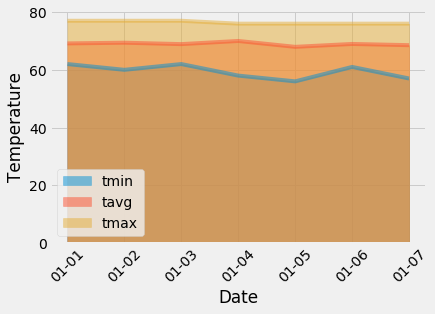

In [50]:
# Plot the daily normals as an area plot with `stacked=False`
ax = df7.plot.area(stacked=False, rot=45)
plt.xlabel("Date")
plt.ylabel("Temperature")